#Fish Price Prediction

Author : Rammya Dharshini K

LGM-Soc - Participant

Download dataset from [here](https://www.kaggle.com/aungpyaeap/fish-market)

###Import Required Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

###Load the Data

In [ ]:
data = pd.read_csv('/content/Fish.csv')
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


###Analyze the Data

In [ ]:
data.shape

(159, 7)

In [ ]:
data.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [ ]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [ ]:
df = data.Species.value_counts()
df

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [ ]:
df = pd.DataFrame(df)
df.T 

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


Visualize in bar graph

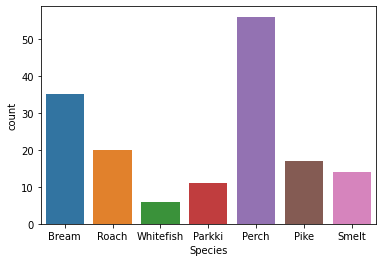

In [ ]:
sns.countplot(data = data, x = 'Species')

Data Cleaning

In [ ]:
data[data.Weight <= 0]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [ ]:
df = data.drop([40])
df.shape

(158, 7)

In [ ]:
df.tail(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
149,Smelt,9.8,10.7,11.2,12.4,2.0832,1.2772
150,Smelt,8.7,10.8,11.3,12.6,1.9782,1.2852
151,Smelt,10.0,11.3,11.8,13.1,2.2139,1.2838
152,Smelt,9.9,11.3,11.8,13.1,2.2139,1.1659
153,Smelt,9.8,11.4,12.0,13.2,2.2044,1.1484
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [ ]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915719,0.918603,0.923090,0.723857,0.886654
Length1,0.915719,1.000000,0.999516,0.992004,0.624409,0.866684
Length2,0.918603,0.999516,1.000000,0.994083,0.639503,0.873201
Length3,0.923090,0.992004,0.994083,1.000000,0.702655,0.878189
Height,0.723857,0.624409,0.639503,0.702655,1.000000,0.792401
Width,0.886654,0.866684,0.873201,0.878189,0.792401,1.000000


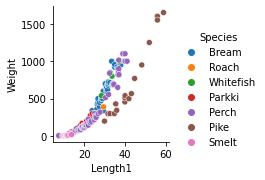

In [ ]:
sns.pairplot(data = df, x_vars = 'Length1', y_vars = 'Weight', hue = 'Species')

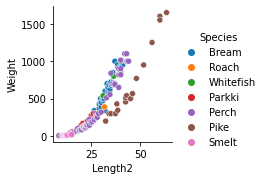

In [ ]:
sns.pairplot(data = df, x_vars = 'Length2', y_vars = 'Weight', hue = 'Species')

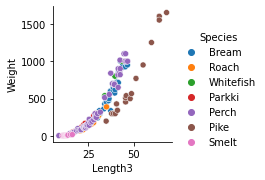

In [ ]:
sns.pairplot(data = df, x_vars = 'Length3', y_vars = 'Weight', hue = 'Species')

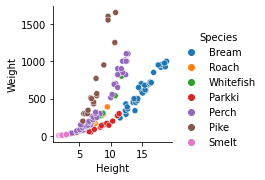

In [ ]:
sns.pairplot(data= df, x_vars = 'Height', y_vars = 'Weight', hue = 'Species')

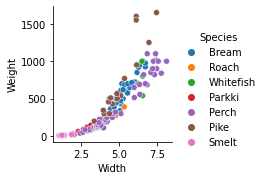

In [ ]:
sns.pairplot(data= df, x_vars = 'Width', y_vars = 'Weight', hue = 'Species')

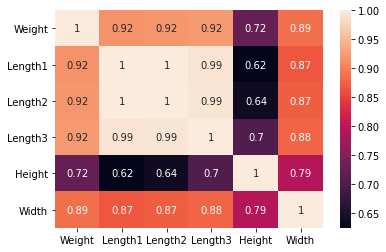

In [ ]:
sns.heatmap(df.corr(), annot = True)

###Outlier for Weight

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


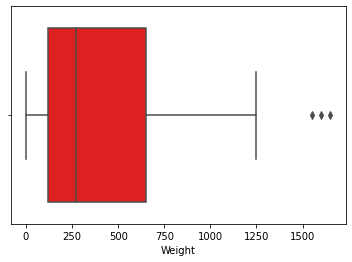

In [ ]:
sns.boxplot(fish_data['Weight'],color = 'r')

In [ ]:
f_weight = data['Weight']

Q1 = f_weight.quantile(0.25)
Q3 = f_weight.quantile(0.75)

IQR = Q3-Q1

l_limit = Q1 -(1.5*IQR)
u_limit = Q3 +(1.5*IQR)

In [ ]:
weight_outliers = f_weight[(f_weight < l_limit) | (f_weight > u_limit)]
weight_outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

###Outlier for Length-1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


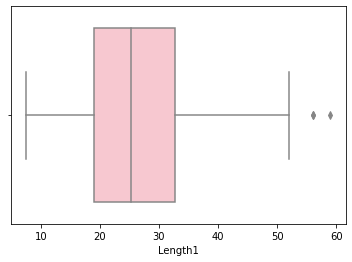

In [ ]:
sns.boxplot(data['Length1'], color = 'pink')

In [ ]:
f_Length1 = data['Length1']
Q3 = f_Length1.quantile(0.75)
Q1 = f_Length1.quantile(0.25)

IQR = Q3-Q1

l_limit = Q1 -(1.5*IQR)
u_limit = Q3 +(1.5*IQR)

In [ ]:
length1_outliers = f_Length1[(f_Length1 < l_limit) | (f_Length1 > u_limit)]
length1_outliers

142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64

###Outlier for Length-2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


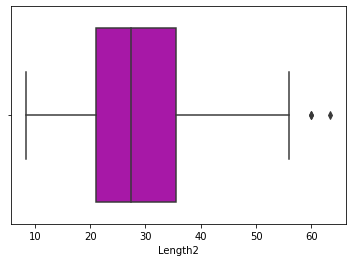

In [ ]:
sns.boxplot(data['Length2'], color = 'm')

In [ ]:
f_Length2 = data['Length2']
Q3 = f_Length2.quantile(0.75)
Q1 = f_Length2.quantile(0.25)

IQR = Q3-Q1

l_limit = Q1 -(1.5*IQR)
u_limit = Q3 +(1.5*IQR)

In [ ]:
length2_outliers = f_Length2[(f_Length2 < l_limit) | (f_Length2 > u_limit)]
length2_outliers

142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64

###Outlier for Length-3

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


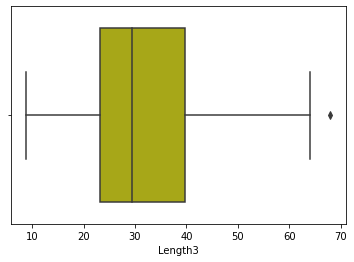

In [ ]:
sns.boxplot(data['Length3'], color = 'y')

In [ ]:
f_Length3 = data['Length3']
Q3 = f_Length3.quantile(0.75)
Q1 = f_Length3.quantile(0.25)

IQR = Q3-Q1

l_limit = Q1 -(1.5*IQR)
u_limit = Q3 +(1.5*IQR)

In [ ]:
length3_outliers = f_Length3[(f_Length3 < l_limit) | (f_Length3 > u_limit)]
length3_outliers

144    68.0
Name: Length3, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


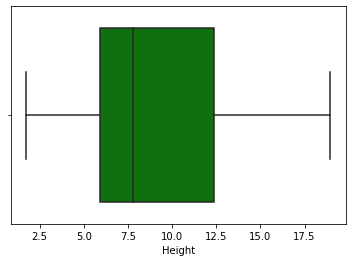

In [ ]:
sns.boxplot(fish_data['Height'], color = 'green')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


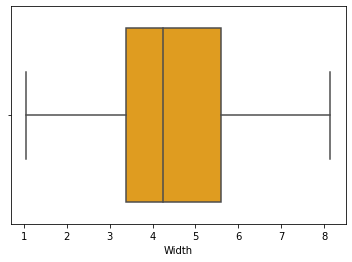

In [ ]:
sns.boxplot(fish_data['Width'], color = 'orange')

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
data[142:145]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [ ]:
df = data.drop([142,143,144])
df.shape

(156, 7)

In [ ]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,375.217308,25.655769,27.786538,30.571154,8.951128,4.375719
std,319.546978,9.119630,9.792651,10.695359,4.324325,1.672188
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.000000,21.000000,23.025000,5.931675,3.369600
50%,271.000000,25.000000,26.750000,29.250000,7.647800,4.243300
75%,612.500000,32.125000,35.000000,39.425000,12.378550,5.424375
max,1250.000000,52.000000,56.000000,59.700000,18.957000,8.142000


###Model

In [ ]:
x = df[['Height','Width']] 
x.head()

,Height,Width
0,11.5200,4.0200
1,12.4800,4.3056
2,12.3778,4.6961
3,12.7300,4.4555
4,12.4440,5.1340


In [ ]:
y = df[['Weight']]
y.head(5)

,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state = 42) 

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_train.shape

(124, 2)

In [ ]:
X_test.shape

(32, 2)

In [ ]:
y_train.shape

(124, 1)

In [ ]:
y_test.shape

(32, 1)

In [ ]:
model.coef_

array([[  9.32525809, 152.28174651]])

In [ ]:
model.intercept_

array([-376.11369337])

In [ ]:
model.score(X_test,y_test)

0.8635790946967572

In [ ]:
pred_Weight = pd.DataFrame(model.predict(X_test), columns=['Predicted Weight']) 
act_Weight = pd.DataFrame(y_test)
act_Weight = act_Weight.reset_index(drop=True) 

df_actual_vs_predicted = pd.concat([act_Weight,pred_Weight],axis =1)
df_actual_vs_predicted.head()

,Weight,Predicted Weight
0,225.0,258.840356
1,200.0,278.262968
2,110.0,218.331947
3,70.0,114.607348
4,700.0,678.909707


Text(0.5, 1.0, 'Weight From test Data Vs Weight Predicted By Model')

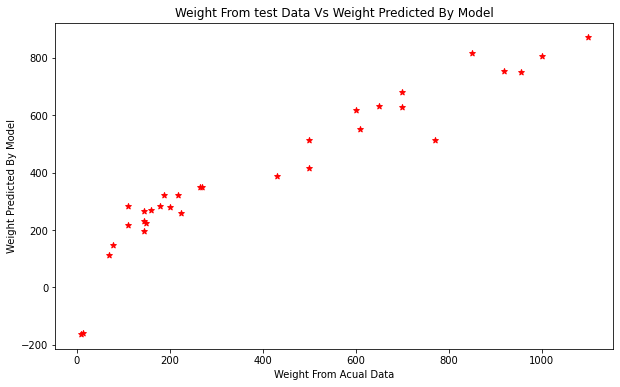

In [ ]:
plt.scatter(y_test, model.predict(X_test), color = 'r' ,marker = '*')
plt.xlabel('Weight From Acual Data')
plt.ylabel('Weight Predicted By Model')
plt.title("Weight From test Data Vs Weight Predicted By Model")

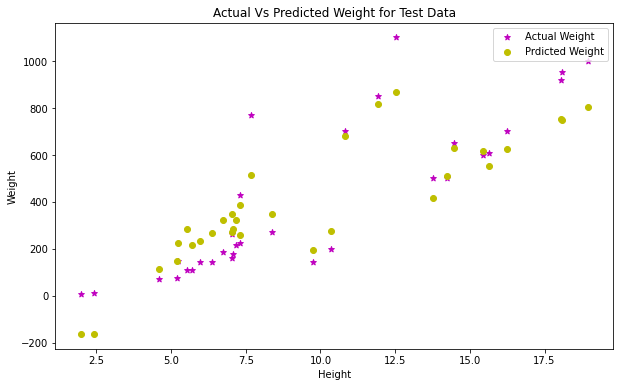

In [ ]:
plt.scatter(X_test['Height'], y_test, color='m', marker = '*', label = 'Actual Weight')
plt.scatter(X_test['Height'], model.predict(X_test), color='y',marker = 'o', label = 'Prdicted Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Actual Vs Predicted Weight for Test Data')
plt.legend()
plt.show()

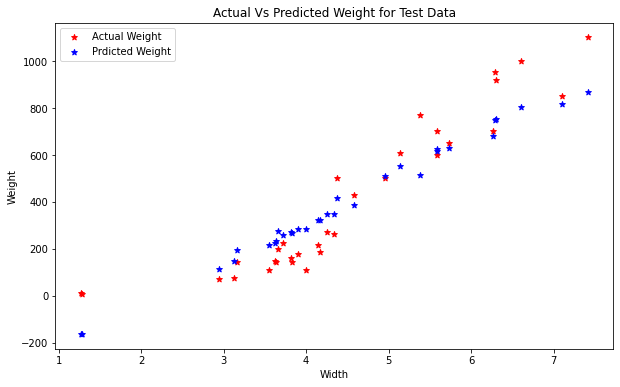

In [ ]:
plt.scatter(X_test['Width'], y_test, color='red', marker = '*' ,label = 'Actual Weight')
plt.scatter(X_test['Width'], model.predict(X_test), color='blue', marker = '*' , label = 'Prdicted Weight')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title('Actual Vs Predicted Weight for Test Data')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


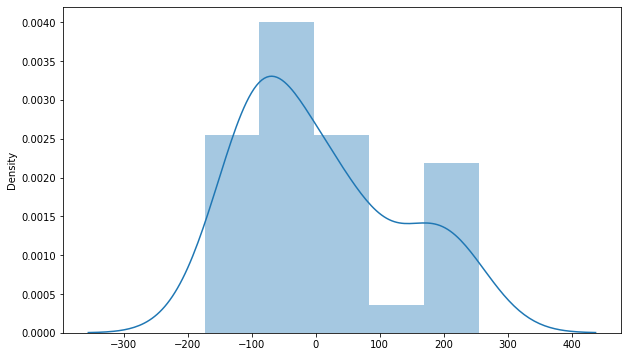

In [ ]:
residual = y_test - model.predict(X_test)
sns.distplot(residual)

###Evaluation

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r_square = r2_score(y_test,pred_Weight)
r_square

0.8635790946967572